In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error


pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)  #  all columns
pd.set_option('display.max_rows', 60)       #  all rows
plt.style.use('classic') # better vizulation
plt.rcParams['figure.figsize'] = [10, 6]
sns.set_theme(style="whitegrid")  #  seaborn style
pd.set_option('display.width', None)

In [2]:
df = pd.read_csv('D600 Task 1 Dataset 1 Housing Information.csv')
# read csv file
print("Dataset Shape:", df.shape)
print("\nColumns in the dataset:")
print(df.columns.tolist())
# look at shape and coulumn names



Dataset Shape: (7000, 22)

Columns in the dataset:
['ID', 'Price', 'SquareFootage', 'NumBathrooms', 'NumBedrooms', 'BackyardSpace', 'CrimeRate', 'SchoolRating', 'AgeOfHome', 'DistanceToCityCenter', 'EmploymentRate', 'PropertyTaxRate', 'RenovationQuality', 'LocalAmenities', 'TransportAccess', 'Fireplace', 'HouseColor', 'Garage', 'Floors', 'Windows', 'PreviousSalePrice', 'IsLuxury']


In [3]:
# check data types & missing values
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7000 non-null   int64  
 1   Price                 7000 non-null   float64
 2   SquareFootage         7000 non-null   float64
 3   NumBathrooms          7000 non-null   float64
 4   NumBedrooms           7000 non-null   int64  
 5   BackyardSpace         7000 non-null   float64
 6   CrimeRate             7000 non-null   float64
 7   SchoolRating          7000 non-null   float64
 8   AgeOfHome             7000 non-null   float64
 9   DistanceToCityCenter  7000 non-null   float64
 10  EmploymentRate        7000 non-null   float64
 11  PropertyTaxRate       7000 non-null   float64
 12  RenovationQuality     7000 non-null   float64
 13  LocalAmenities        7000 non-null   float64
 14  TransportAccess       7000 non-null   float64
 15  Firepl

In [4]:
# display rows with better formatting
print("\nFirst few rows of the dataset:")

df.head()


First few rows of the dataset:


,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,EmploymentRate,PropertyTaxRate,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,4922,255614.90,566.62,1.00,4,779.42,20.56,5.62,39.46,10.08,97.29,1.84,4.93,4.44,4.55,Yes,Blue,No,1,13,181861.54,0
1,5009,155586.09,1472.34,1.00,2,656.13,15.62,5.63,40.51,7.89,93.22,0.95,4.08,5.56,6.83,No,Green,No,1,17,50042.60,0
2,4450,131050.83,550.00,1.78,3,754.57,12.47,9.20,48.38,23.74,96.60,1.87,4.26,8.07,8.48,Yes,Green,Yes,2,34,48400.34,0
3,1070,151361.71,941.81,2.04,2,439.59,22.22,7.08,94.67,5.22,91.45,1.45,4.45,5.00,6.27,Yes,Red,No,1,14,84594.12,0
4,400,113167.61,550.00,1.06,3,353.03,8.28,5.93,16.80,43.13,86.50,1.26,3.36,5.46,6.99,No,White,Yes,1,21,22934.60,0


In [5]:

#  copy of dataframe for analysis
data = df.copy()  

# missing values 
data.isnull().sum()

ID                      0
Price                   0
SquareFootage           0
NumBathrooms            0
NumBedrooms             0
BackyardSpace           0
CrimeRate               0
SchoolRating            0
AgeOfHome               0
DistanceToCityCenter    0
EmploymentRate          0
PropertyTaxRate         0
RenovationQuality       0
LocalAmenities          0
TransportAccess         0
Fireplace               0
HouseColor              0
Garage                  0
Floors                  0
Windows                 0
PreviousSalePrice       0
IsLuxury                0
dtype: int64

In [6]:
# data types 
data.dtypes


ID                        int64
Price                   float64
SquareFootage           float64
NumBathrooms            float64
NumBedrooms               int64
BackyardSpace           float64
CrimeRate               float64
SchoolRating            float64
AgeOfHome               float64
DistanceToCityCenter    float64
EmploymentRate          float64
PropertyTaxRate         float64
RenovationQuality       float64
LocalAmenities          float64
TransportAccess         float64
Fireplace                object
HouseColor               object
Garage                   object
Floors                    int64
Windows                   int64
PreviousSalePrice       float64
IsLuxury                  int64
dtype: object

In [7]:
data.describe()

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,EmploymentRate,PropertyTaxRate,RenovationQuality,LocalAmenities,TransportAccess,Floors,Windows,PreviousSalePrice,IsLuxury
count,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00
mean,3500.50,307281.97,1048.95,2.13,3.01,511.51,31.23,6.94,46.80,17.48,93.71,1.50,5.00,5.93,5.98,1.16,16.25,284509.35,0.50
std,2020.87,150173.43,426.01,0.95,1.02,279.93,18.03,1.89,31.78,12.02,4.51,0.50,1.97,2.66,1.95,0.37,8.93,185734.02,0.50
min,1.00,85000.00,550.00,1.00,1.00,0.39,0.03,0.22,0.01,0.00,72.05,0.01,0.01,0.00,0.01,1.00,-6.00,-8356.90,0.00
25%,1750.75,192107.53,660.82,1.29,2.00,301.00,17.39,5.65,20.76,7.83,90.62,1.16,3.66,4.00,4.68,1.00,11.00,142013.98,0.00
50%,3500.50,279322.95,996.32,2.00,3.00,495.97,30.38,7.01,42.62,15.62,94.01,1.49,5.02,6.04,6.00,1.00,15.00,262183.13,1.00
75%,5250.25,391878.13,1342.29,2.76,4.00,704.01,43.67,8.36,67.23,25.22,97.41,1.84,6.35,8.05,7.35,1.00,20.00,396121.17,1.00
max,7000.00,1046675.64,2874.70,5.81,7.00,1631.36,99.73,10.00,178.68,65.20,99.90,3.36,10.00,10.00,10.00,3.00,63.00,1296606.69,1.00


In [8]:
# check Fireplace values
print(data['Fireplace'].value_counts())

# check HouseColor values
print(data['HouseColor'].value_counts())

# check Garage values
print(data['Garage'].value_counts())



Fireplace
No     5172
Yes    1828
Name: count, dtype: int64
HouseColor
White     1446
Yellow    1423
Blue      1409
Green     1375
Red       1347
Name: count, dtype: int64
Garage
No     4488
Yes    2512
Name: count, dtype: int64


In [9]:
# check for invalid values 
print("=== Invalid Values Analysis ===")

# price checks
print("\nPrice Checks:")
print(f"Rows with negative previous sale prices: {len(data[data['PreviousSalePrice'] < 0])}")
print(f"Rows with current prices < $50,000: {len(data[data['Price'] < 50000])}")

# independent var checks
print("\nPhysical Features Checks:")
print(f"Rows with negative windows: {len(data[data['Windows'] < 0])}")
print(f"Rows with bathrooms > 5.5: {len(data[data['NumBathrooms'] > 5.5])}")
print(f"Rows with bedrooms > 10: {len(data[data['NumBedrooms'] > 10])}")
print(f"Rows with square footage < 100: {len(data[data['SquareFootage'] < 100])}")


# ratings and percentages checks
print("\nRatings and Percentages Checks:")
print(f"Rows with school ratings > 10: {len(data[data['SchoolRating'] > 10])}")
print(f"Rows with employment rate > 100%: {len(data[data['EmploymentRate'] > 100])}")



=== Invalid Values Analysis ===

Price Checks:
Rows with negative previous sale prices: 28
Rows with current prices < $50,000: 0

Physical Features Checks:
Rows with negative windows: 50
Rows with bathrooms > 5.5: 10
Rows with bedrooms > 10: 0
Rows with square footage < 100: 0

Ratings and Percentages Checks:
Rows with school ratings > 10: 0
Rows with employment rate > 100%: 0


In [10]:

#remove rows with neg sale prices
data_cleaned = data[data['PreviousSalePrice'] >= 0]

#replace neg windows with median
median_windows = data_cleaned['Windows'].median()
data_cleaned.loc[data_cleaned['Windows'] < 0, 'Windows'] = median_windows

#cap bathrooms at 5
data_cleaned.loc[:,'NumBathrooms'] = data_cleaned['NumBathrooms'].clip(upper=5.5)

# show cleaned data
data_cleaned.describe()


,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,EmploymentRate,PropertyTaxRate,RenovationQuality,LocalAmenities,TransportAccess,Floors,Windows,PreviousSalePrice,IsLuxury
count,6972.00,6972.00,6972.00,6972.00,6972.00,6972.00,6972.00,6972.00,6972.00,6972.00,6972.00,6972.00,6972.00,6972.00,6972.00,6972.00,6972.00,6972.00,6972.00
mean,3499.77,308119.47,1050.46,2.13,3.01,511.38,31.24,6.95,46.85,17.46,93.71,1.50,5.01,5.93,5.98,1.16,16.37,285664.88,0.51
std,2020.50,149890.38,425.99,0.95,1.02,280.15,18.03,1.89,31.79,12.01,4.51,0.50,1.97,2.66,1.95,0.37,8.78,185207.47,0.50
min,1.00,85000.00,550.00,1.00,1.00,0.39,0.03,0.22,0.01,0.00,72.05,0.01,0.01,0.00,0.01,1.00,0.00,22.80,0.00
25%,1750.75,192851.43,663.04,1.29,2.00,300.72,17.40,5.66,20.81,7.83,90.61,1.16,3.67,4.00,4.67,1.00,11.00,142929.55,0.00
50%,3500.50,280477.46,999.67,2.00,3.00,495.92,30.39,7.01,42.69,15.61,94.01,1.49,5.03,6.04,6.00,1.00,15.00,262872.06,1.00
75%,5249.25,392435.11,1344.09,2.77,4.00,704.20,43.67,8.37,67.25,25.20,97.41,1.84,6.36,8.05,7.35,1.00,20.00,396922.51,1.00
max,7000.00,1046675.64,2874.70,5.50,7.00,1631.36,99.73,10.00,178.68,65.20,99.90,3.36,10.00,10.00,10.00,3.00,63.00,1296606.69,1.00


In [11]:
# look for correlatiopn to slect variables
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
correlations = data_cleaned[numeric_columns].corr()['Price'].sort_values(ascending=False)
print("Correlations with Price:")
print(correlations)


# choose variables based on correlation strength
variables = ['Price', 'SquareFootage', 'NumBathrooms', 'NumBedrooms', 
            'DistanceToCityCenter', 'BackyardSpace', 'SchoolRating', 'AgeOfHome']

#  descriptive statistics for selected variables
descriptive_stats = data_cleaned[variables].describe()


#  statistics for selected variables
descriptive_stats


Correlations with Price:
Price                   1.00
PreviousSalePrice       0.82
IsLuxury                0.63
SquareFootage           0.55
RenovationQuality       0.48
NumBathrooms            0.46
NumBedrooms             0.46
SchoolRating            0.38
LocalAmenities          0.16
TransportAccess         0.15
EmploymentRate          0.08
BackyardSpace           0.07
Floors                  0.01
Windows                 0.01
ID                     -0.01
CrimeRate              -0.07
AgeOfHome              -0.14
PropertyTaxRate        -0.16
DistanceToCityCenter   -0.21
Name: Price, dtype: float64


,Price,SquareFootage,NumBathrooms,NumBedrooms,DistanceToCityCenter,BackyardSpace,SchoolRating,AgeOfHome
count,6972.00,6972.00,6972.00,6972.00,6972.00,6972.00,6972.00,6972.00
mean,308119.47,1050.46,2.13,3.01,17.46,511.38,6.95,46.85
std,149890.38,425.99,0.95,1.02,12.01,280.15,1.89,31.79
min,85000.00,550.00,1.00,1.00,0.00,0.39,0.22,0.01
25%,192851.43,663.04,1.29,2.00,7.83,300.72,5.66,20.81
50%,280477.46,999.67,2.00,3.00,15.61,495.92,7.01,42.69
75%,392435.11,1344.09,2.77,4.00,25.20,704.20,8.37,67.25
max,1046675.64,2874.70,5.50,7.00,65.20,1631.36,10.00,178.68


In [12]:
# select variables using correlation and logical importance
variables = ['Price', 'SquareFootage', 'NumBathrooms', 'NumBedrooms', 
            'RenovationQuality', 'SchoolRating', 'DistanceToCityCenter', 'AgeOfHome']

#  descriptive statistics for selected variables
descriptive_stats = data_cleaned[variables].describe()

# statistics for selected variables
descriptive_stats

,Price,SquareFootage,NumBathrooms,NumBedrooms,RenovationQuality,SchoolRating,DistanceToCityCenter,AgeOfHome
count,6972.00,6972.00,6972.00,6972.00,6972.00,6972.00,6972.00,6972.00
mean,308119.47,1050.46,2.13,3.01,5.01,6.95,17.46,46.85
std,149890.38,425.99,0.95,1.02,1.97,1.89,12.01,31.79
min,85000.00,550.00,1.00,1.00,0.01,0.22,0.00,0.01
25%,192851.43,663.04,1.29,2.00,3.67,5.66,7.83,20.81
50%,280477.46,999.67,2.00,3.00,5.03,7.01,15.61,42.69
75%,392435.11,1344.09,2.77,4.00,6.36,8.37,25.20,67.25
max,1046675.64,2874.70,5.50,7.00,10.00,10.00,65.20,178.68


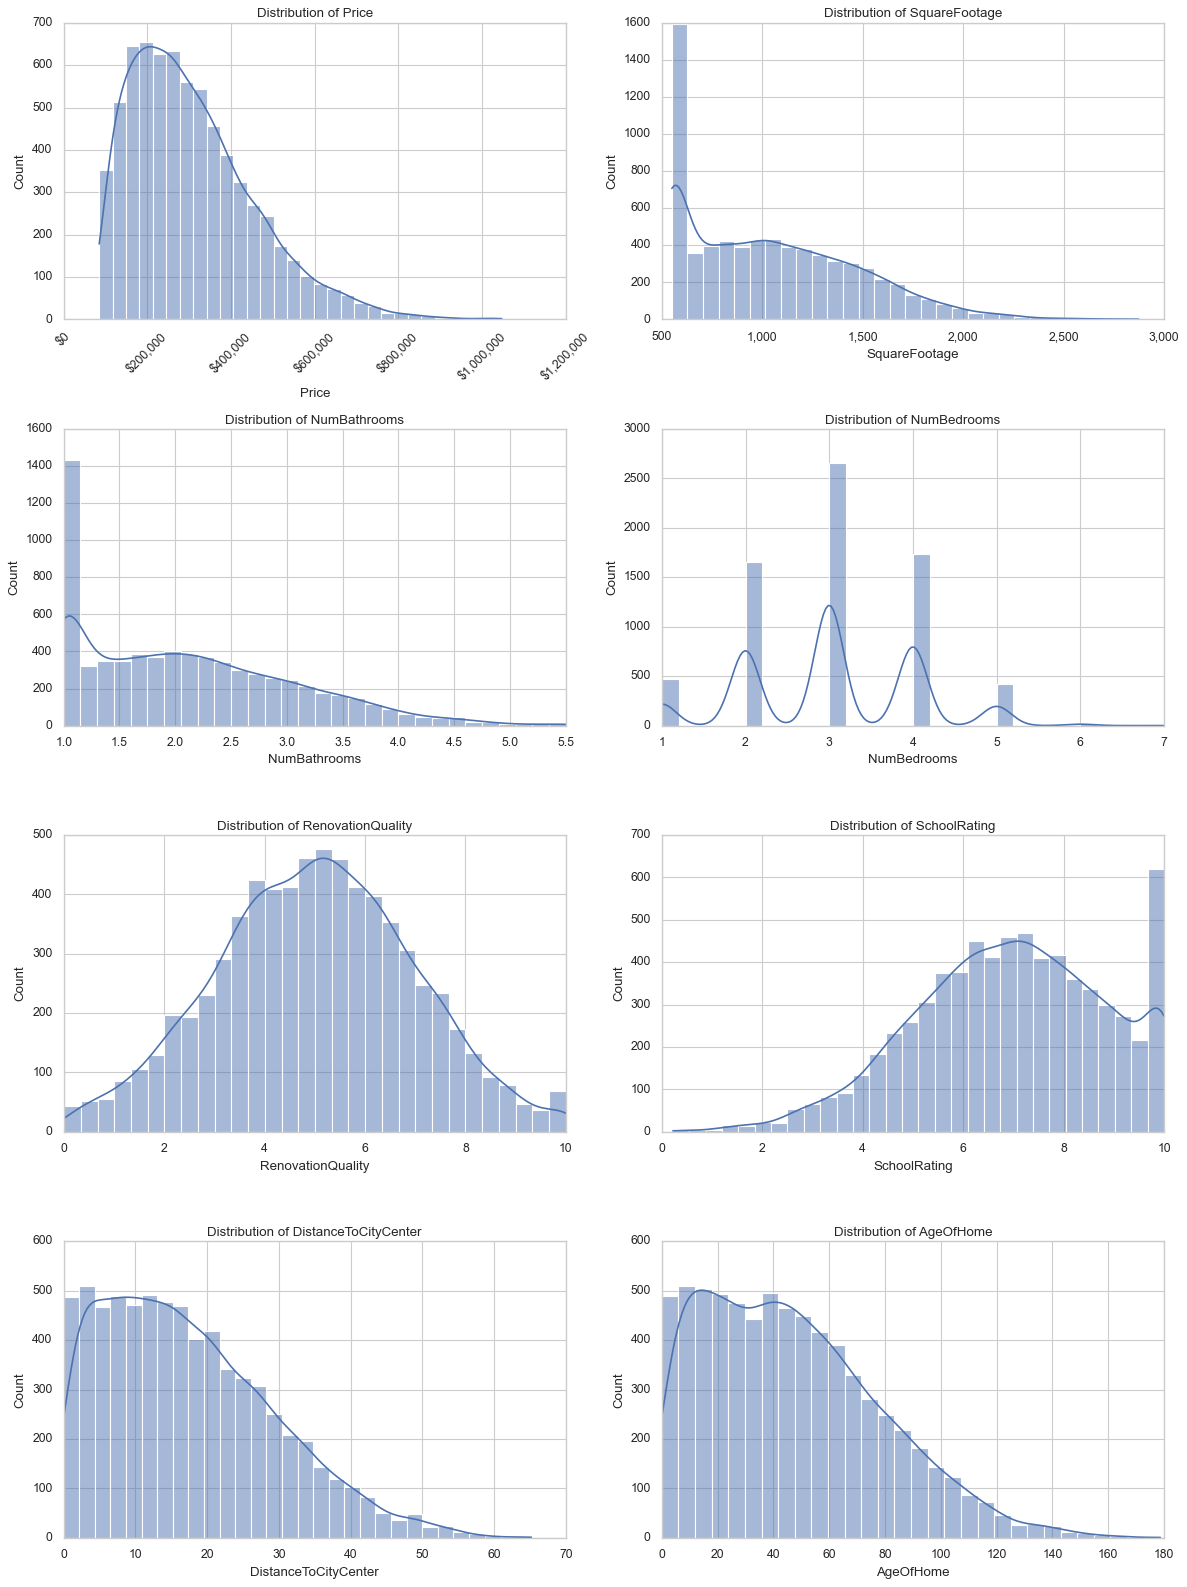

In [13]:
# univariate distributions
variables =  ['Price', 'SquareFootage', 'NumBathrooms', 'NumBedrooms', 
            'RenovationQuality', 'SchoolRating', 'DistanceToCityCenter', 'AgeOfHome']


#  2 plots per row
fig, axes = plt.subplots(nrows=(len(variables) + 1) // 2, ncols=2, figsize=(15, 20))
axes = axes.flatten()


# plot variables for better formatting
for i, var in enumerate(variables):
    sns.histplot(data=data_cleaned[var], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    
    # format price axis with dollar signs
    if var == 'Price':
        axes[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
        axes[i].tick_params(axis='x', rotation=45)
    
    # format sf with comma 
    if var == 'SquareFootage':
        axes[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))



# hide unused subplots 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



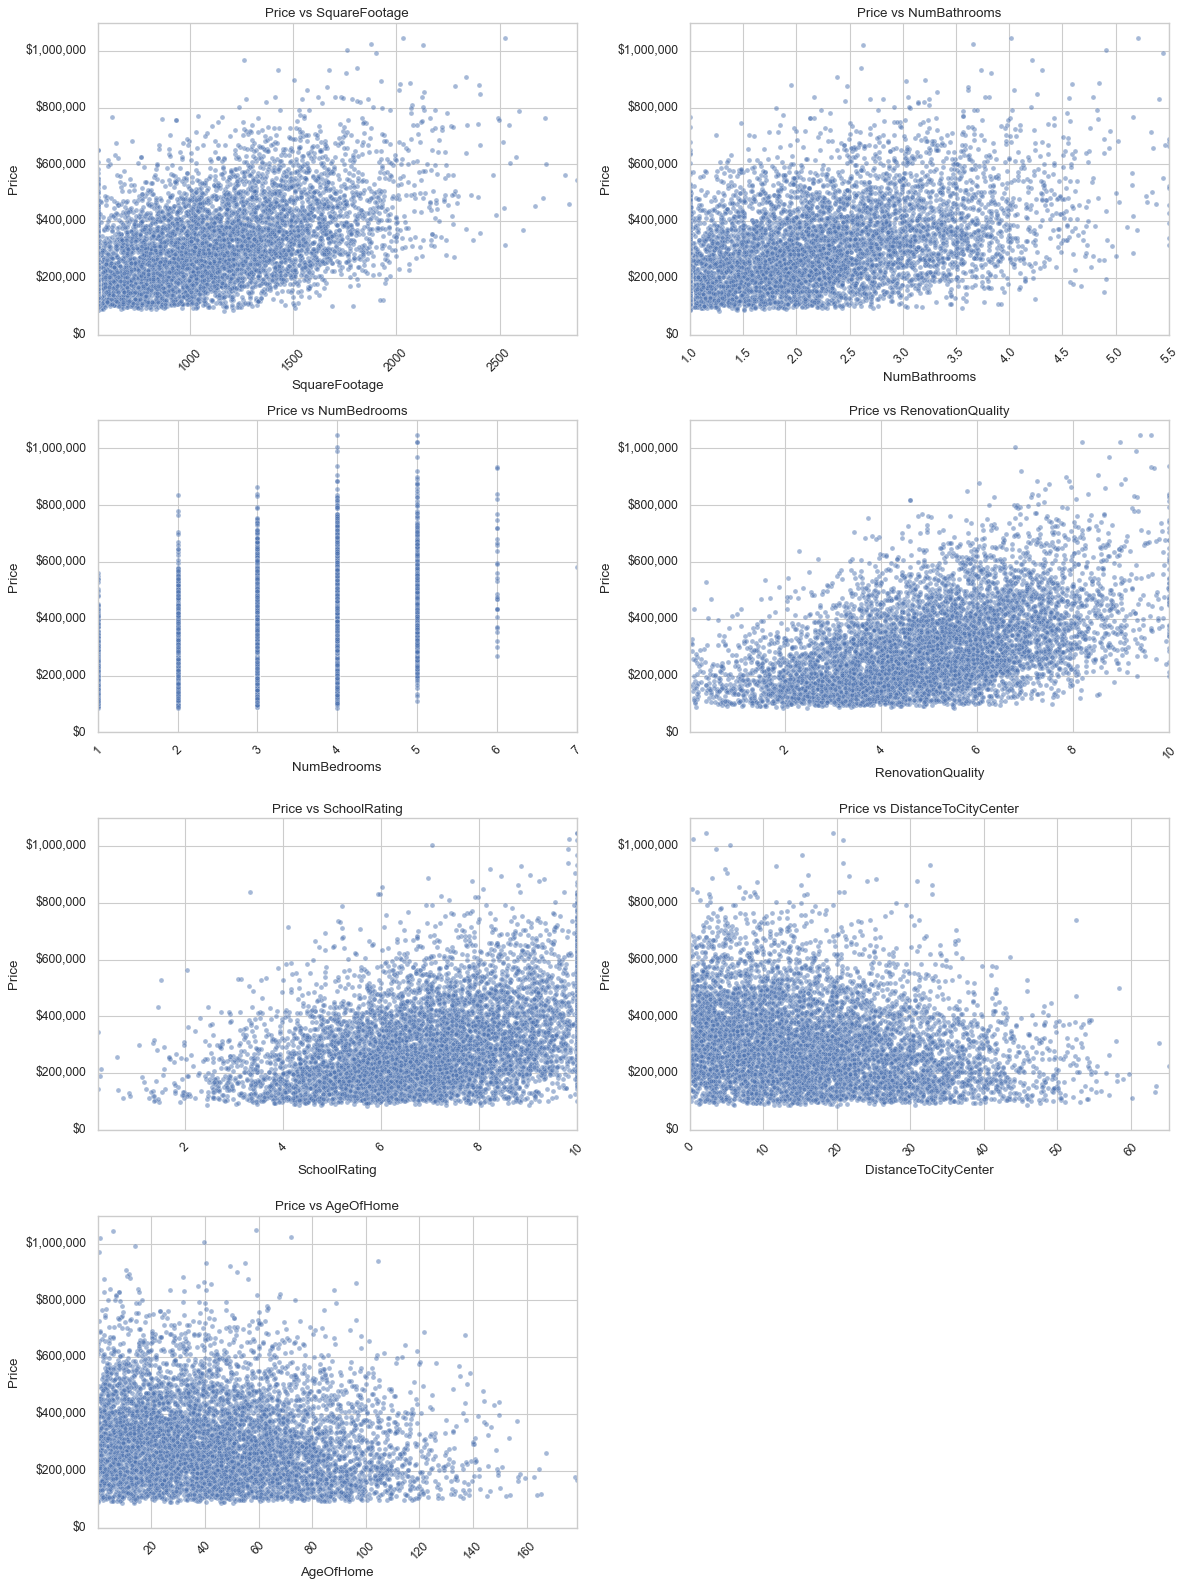

In [14]:
#  scatter plots for each variable vs price
variables = ['SquareFootage', 'NumBathrooms', 'NumBedrooms', 
            'RenovationQuality', 'SchoolRating', 'DistanceToCityCenter', 'AgeOfHome']

#  grid of 2 plots per row
fig, axes = plt.subplots(nrows=(len(variables) + 1) // 2, ncols=2, figsize=(15, 20))
axes = axes.flatten()

#  currency for price axis
def currency_formatter(x, p):
    return f'${x:,.0f}'

# plot each variable vs price
for i, var in enumerate(variables):
    sns.scatterplot(data=data_cleaned, x=var, y='Price', alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Price vs {var}')
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(currency_formatter))
    
    #  x-axis limits based on data range
    min_val = data_cleaned[var].min()
    max_val = data_cleaned[var].max()
    axes[i].set_xlim(min_val, max_val)
    
    #  y-axis limits
    axes[i].set_ylim(0, data_cleaned['Price'].max() * 1.05)  # 5% padding
    
    # rotate x-axis labels 
    axes[i].tick_params(axis='x', rotation=45)

# remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [15]:

# selectingt he dependant and independant variables

X = data_cleaned[['SquareFootage', 'NumBathrooms', 'NumBedrooms', 
                  'RenovationQuality', 'SchoolRating', 'DistanceToCityCenter', 'AgeOfHome']]
y = data_cleaned['Price']

# 80/20 test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")


Training data size: (5577, 7)
Testing data size: (1395, 7)


In [16]:
# setting pandas and numpy disp[lay options
pd.set_option('display.float_format', '{:.2f}'.format)
np.set_printoptions(suppress=True)

# creating constant model for intercept
X_train_const = sm.add_constant(X_train)

# fitting the regression model
model = sm.OLS(y_train, X_train_const).fit()

# summery
summary = model.summary()

# change to string and replace scientific notation
summary_str = str(summary)
import re

def format_number(match):
    num = float(match.group(0).replace('e+', 'e'))
    if abs(num) > 1000:
        return f"{num:,.2f}"
    return f"{num:.2f}"

# changing scientific notation with formatted numbers
summary_str = re.sub(r'-?\d+\.\d+e[+-]\d+', format_number, summary_str)
summary_str = re.sub(r'\d+e[+-]\d+', format_number, summary_str)

print(summary_str)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     1193.
Date:                Mon, 20 Jan 2025   Prob (F-statistic):               0.00
Time:                        09:35:51   Log-Likelihood:                -71851.
No. Observations:                5577   AIC:                         143,700.00
Df Residuals:                    5569   BIC:                         143,800.00
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -133,400.

In [17]:
# check  correlation
print("Correlation between Price and SchoolRating:")
print(data_cleaned['Price'].corr(data_cleaned['SchoolRating']))



Correlation between Price and SchoolRating:
0.3849064761098551


In [18]:
# group prices by school rating 
school_price_analysis = data_cleaned.groupby(data_cleaned['SchoolRating'].round())['Price'].agg(['mean', 'count']).round(2)
school_price_analysis.columns = ['Average Price', 'Number of Houses']
print("\nAverage Prices by School Rating:")
print(school_price_analysis)



# check correlations between SchoolRating and other independent variables
print("\nCorrelations between SchoolRating and other variables:")
correlations = data_cleaned[['SchoolRating', 'SquareFootage', 'NumBathrooms', 'NumBedrooms', 
                            'RenovationQuality', 'DistanceToCityCenter', 'AgeOfHome']].corr()['SchoolRating']
print(correlations)




Average Prices by School Rating:
              Average Price  Number of Houses
SchoolRating                                 
0.00              223406.06                 4
1.00              178621.87                23
2.00              213533.09                57
3.00              220687.59               210
4.00              220984.42               432
5.00              249556.82               828
6.00              271883.34              1257
7.00              302302.90              1352
8.00              334960.02              1203
9.00              366595.11               878
10.00             422108.00               728

Correlations between SchoolRating and other variables:
SchoolRating            1.00
SquareFootage           0.28
NumBathrooms            0.24
NumBedrooms             0.38
RenovationQuality       0.49
DistanceToCityCenter   -0.17
AgeOfHome              -0.13
Name: SchoolRating, dtype: float64


In [19]:

# standardize the continuous variables otehr than target price
from sklearn.preprocessing import StandardScaler

# var to standardize
vars_to_standardize = ['SquareFootage', 'NumBathrooms', 'NumBedrooms', 
                      'RenovationQuality', 'SchoolRating', 'DistanceToCityCenter', 'AgeOfHome']



#scaler
scaler = StandardScaler()

#  standardized version
X_train_std = pd.DataFrame(scaler.fit_transform(X_train[vars_to_standardize]), 
                          columns=vars_to_standardize,
                          index=X_train.index)


# add constant and run new regression
X_train_std_const = sm.add_constant(X_train_std)
model_std = sm.OLS(y_train, X_train_std_const).fit()

# summary
summary = model_std.summary()

# change to string and replace scientific notation
summary_str = str(summary)
import re

def format_number(match):
    num = float(match.group(0).replace('e+', 'e'))
    if abs(num) > 1000:
        return f"{num:,.2f}"
    return f"{num:.2f}"

#change scientific notation with formatted numbers
summary_str = re.sub(r'-?\d+\.\d+e[+-]\d+', format_number, summary_str)
summary_str = re.sub(r'\d+e[+-]\d+', format_number, summary_str)

print(summary_str)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     1193.
Date:                Mon, 20 Jan 2025   Prob (F-statistic):               0.00
Time:                        09:35:52   Log-Likelihood:                -71851.
No. Observations:                5577   AIC:                         143,700.00
Df Residuals:                    5569   BIC:                         143,800.00
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 309,600.

In [20]:
# var without school rating
vars_to_standardize = ['SquareFootage', 'NumBathrooms', 'NumBedrooms', 
                      'RenovationQuality', 'DistanceToCityCenter', 'AgeOfHome']

# scaler
scaler = StandardScaler()

# standardized version
X_train_std = pd.DataFrame(scaler.fit_transform(X_train[vars_to_standardize]), 
                          columns=vars_to_standardize,
                          index=X_train.index)

# add constant and run new regression
X_train_std_const = sm.add_constant(X_train_std)
model_std = sm.OLS(y_train, X_train_std_const).fit()

# display results
summary = model_std.summary()
summary_str = str(summary)

def format_number(match):
    num = float(match.group(0).replace('e+', 'e'))
    if abs(num) > 1000:
        return f"{num:,.2f}"
    return f"{num:.2f}"

summary_str = re.sub(r'-?\d+\.\d+e[+-]\d+', format_number, summary_str)
summary_str = re.sub(r'\d+e[+-]\d+', format_number, summary_str)

print(summary_str)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     1390.
Date:                Mon, 20 Jan 2025   Prob (F-statistic):               0.00
Time:                        09:35:52   Log-Likelihood:                -71853.
No. Observations:                5577   AIC:                         143,700.00
Df Residuals:                    5570   BIC:                         143,800.00
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 309,600.

In [21]:
# selectingt he dependant and independant variables

X = data_cleaned[['SquareFootage', 'NumBathrooms', 'NumBedrooms', 
                  'RenovationQuality',  'DistanceToCityCenter', 'AgeOfHome']]
y = data_cleaned['Price']

# 80/20 test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")

Training data size: (5577, 6)
Testing data size: (1395, 6)


In [22]:
from io import StringIO  # import stringIO for  handling of HTML content

# display formatted summary
summary = model.summary()

# modify summary table
formatted_summary = summary.tables[1].as_html()
formatted_summary_df = pd.read_html(StringIO(formatted_summary), header=0, index_col=0)[0]
formatted_summary_df = formatted_summary_df.round(2)

# display reformatted table
formatted_summary_df


,coef,std err,t,P>|t|,[0.025,0.975]
const,-133400.00,7145.41,-18.67,0.00,-147000.00,-119000.00
SquareFootage,147.77,3.31,44.70,0.00,141.29,154.26
NumBathrooms,51370.00,1426.74,36.00,0.00,48600.00,54200.00
NumBedrooms,53340.00,1373.82,38.83,0.00,50600.00,56000.00
RenovationQuality,8507.09,812.55,10.47,0.00,6914.18,10100.00
SchoolRating,-1769.28,827.75,-2.14,0.03,-3391.99,-146.56
DistanceToCityCenter,-397.96,109.80,-3.62,0.00,-613.22,-182.70
AgeOfHome,-147.52,41.04,-3.59,0.00,-227.98,-67.07


In [23]:

# calculate MSE for training data
y_train_pred = model_std.predict(X_train_std_const)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (Training Data): {mse_train:,.2f}")



# prep test data using same standardization
X_test_std = pd.DataFrame(scaler.transform(X_test[vars_to_standardize]), 
                         columns=vars_to_standardize,
                         index=X_test.index)
X_test_std_const = sm.add_constant(X_test_std)


# calculate MSE for test data
y_test_pred = model_std.predict(X_test_std_const)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (Test Data): {mse_test:,.2f}")



Mean Squared Error (Training Data): 9,083,055,254.53
Mean Squared Error (Test Data): 8,796,795,743.16


In [24]:
# calculate RMSE for both sets
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print(f"Root Mean Squared Error (Training Data): ${rmse_train:,.2f}")
print(f"Root Mean Squared Error (Test Data): ${rmse_test:,.2f}")



Root Mean Squared Error (Training Data): $95,305.06
Root Mean Squared Error (Test Data): $93,791.23


In [25]:
# save the training and test datasets to files
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)


train_data.to_csv('training_dataset_task1.csv', index=False)
test_data.to_csv('test_dataset_task1.csv', index=False)
print('Training and Test Data Saved')


Training and Test Data Saved


In [26]:
# store coefficients and create regression equation
coefficients = model_std.params
equation = f"Price = {coefficients['const']:.2f}"
for var in vars_to_standardize:
    equation += f" + ({coefficients[var]:.2f} × {var})"

print("\nRegression Equation:")
print(equation)



Regression Equation:
Price = 309598.26 + (62477.41 × SquareFootage) + (48877.37 × NumBathrooms) + (53505.78 × NumBedrooms) + (15639.28 × RenovationQuality) + (-4647.77 × DistanceToCityCenter) + (-4527.67 × AgeOfHome)


In [27]:
# cal MSE for both sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("\nModel Metrics:")
print(f"R-squared (Training): {model_std.rsquared:.3f}")
print(f"Adjusted R-squared (Training): {model_std.rsquared_adj:.3f}")
print(f"MSE (Training): {mse_train:,.2f}")
print(f"MSE (Test): {mse_test:,.2f}")


Model Metrics:
R-squared (Training): 0.600
Adjusted R-squared (Training): 0.599
MSE (Training): 9,083,055,254.53
MSE (Test): 8,796,795,743.16


In [28]:
data2 = data[["Price", "SquareFootage", "NumBathrooms", "NumBedrooms", "AgeOfHome", "DistanceToCityCenter", "RenovationQuality"]]

print(data2.describe())

           Price  SquareFootage  NumBathrooms  NumBedrooms  AgeOfHome  \
count    7000.00        7000.00       7000.00      7000.00    7000.00   
mean   307281.97        1048.95          2.13         3.01      46.80   
std    150173.43         426.01          0.95         1.02      31.78   
min     85000.00         550.00          1.00         1.00       0.01   
25%    192107.53         660.82          1.29         2.00      20.76   
50%    279322.95         996.32          2.00         3.00      42.62   
75%    391878.13        1342.29          2.76         4.00      67.23   
max   1046675.64        2874.70          5.81         7.00     178.68   

       DistanceToCityCenter  RenovationQuality  
count               7000.00            7000.00  
mean                  17.48               5.00  
std                   12.02               1.97  
min                    0.00               0.01  
25%                    7.83               3.66  
50%                   15.62               5.02  

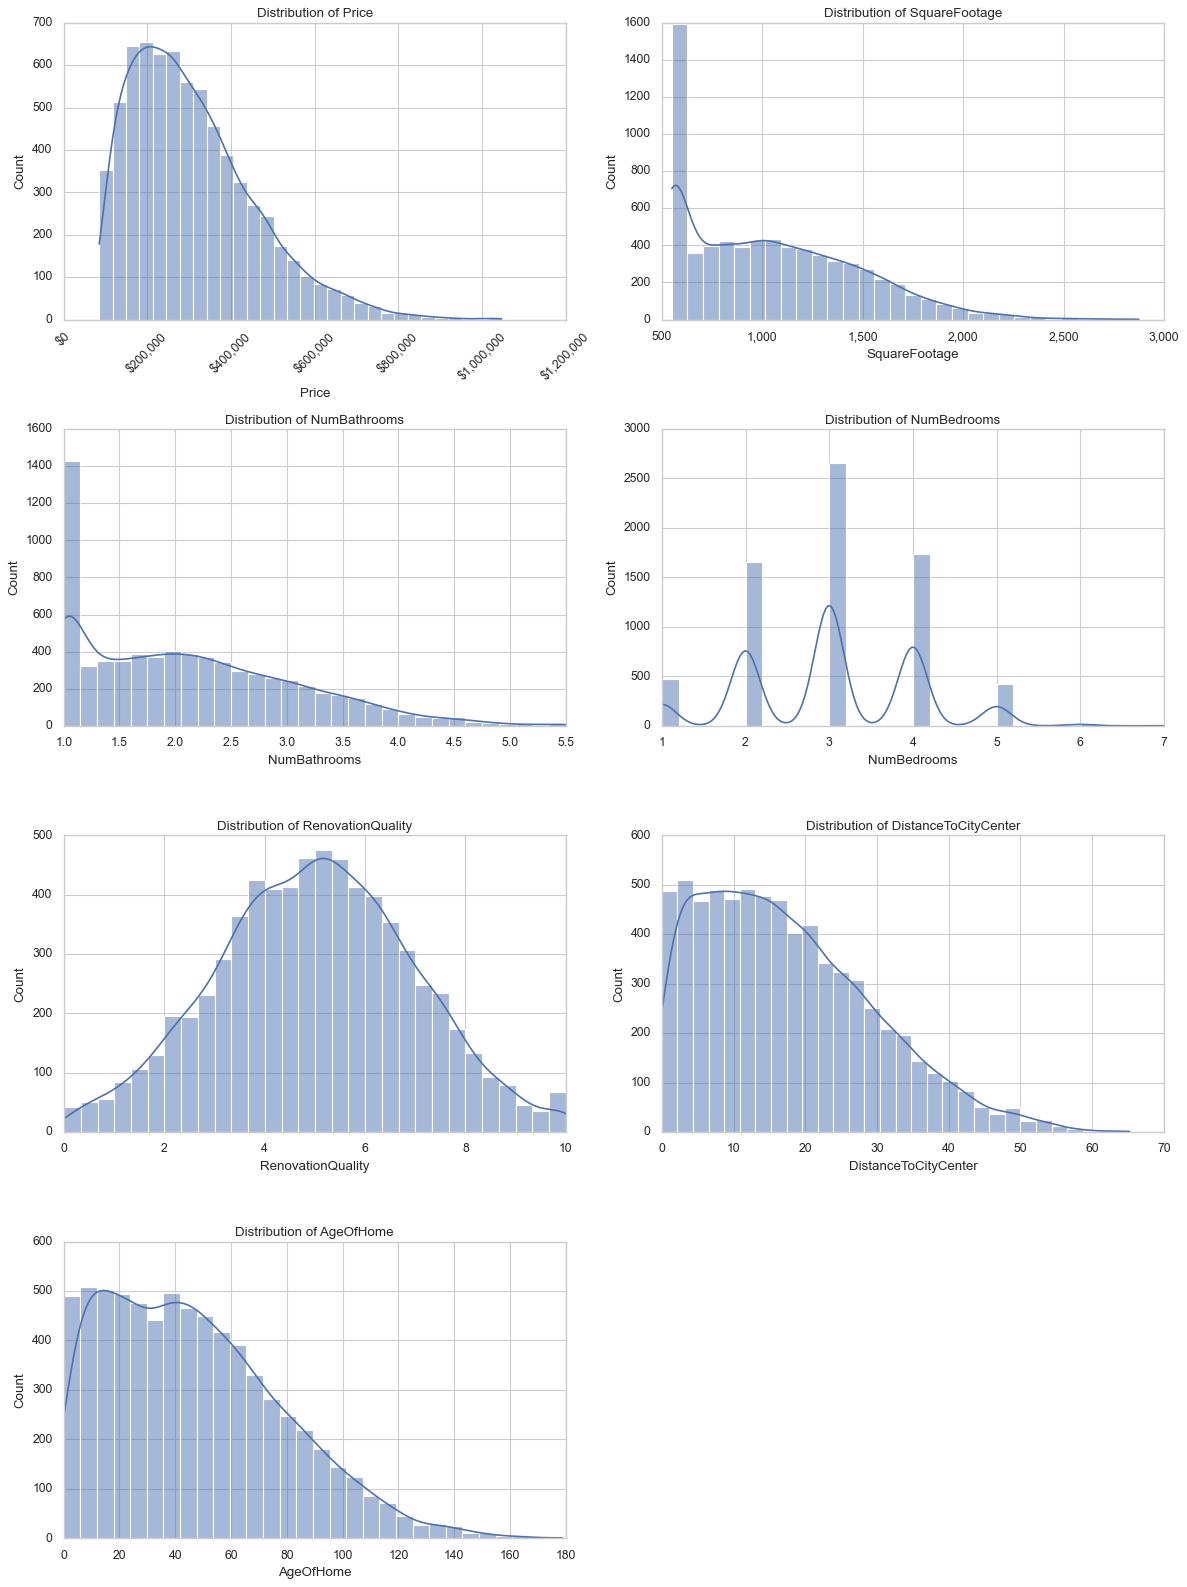

In [29]:
# univariate distributions extra graph
variables =  ['Price', 'SquareFootage', 'NumBathrooms', 'NumBedrooms', 
            'RenovationQuality',  'DistanceToCityCenter', 'AgeOfHome']


#  2 plots per row
fig, axes = plt.subplots(nrows=(len(variables) + 1) // 2, ncols=2, figsize=(15, 20))
axes = axes.flatten()


# plot variables for better formatting
for i, var in enumerate(variables):
    sns.histplot(data=data_cleaned[var], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    
    # format price axis with dollar signs
    if var == 'Price':
        axes[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
        axes[i].tick_params(axis='x', rotation=45)
    
    # format sf with comma 
    if var == 'SquareFootage':
        axes[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))



# hide unused subplots 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


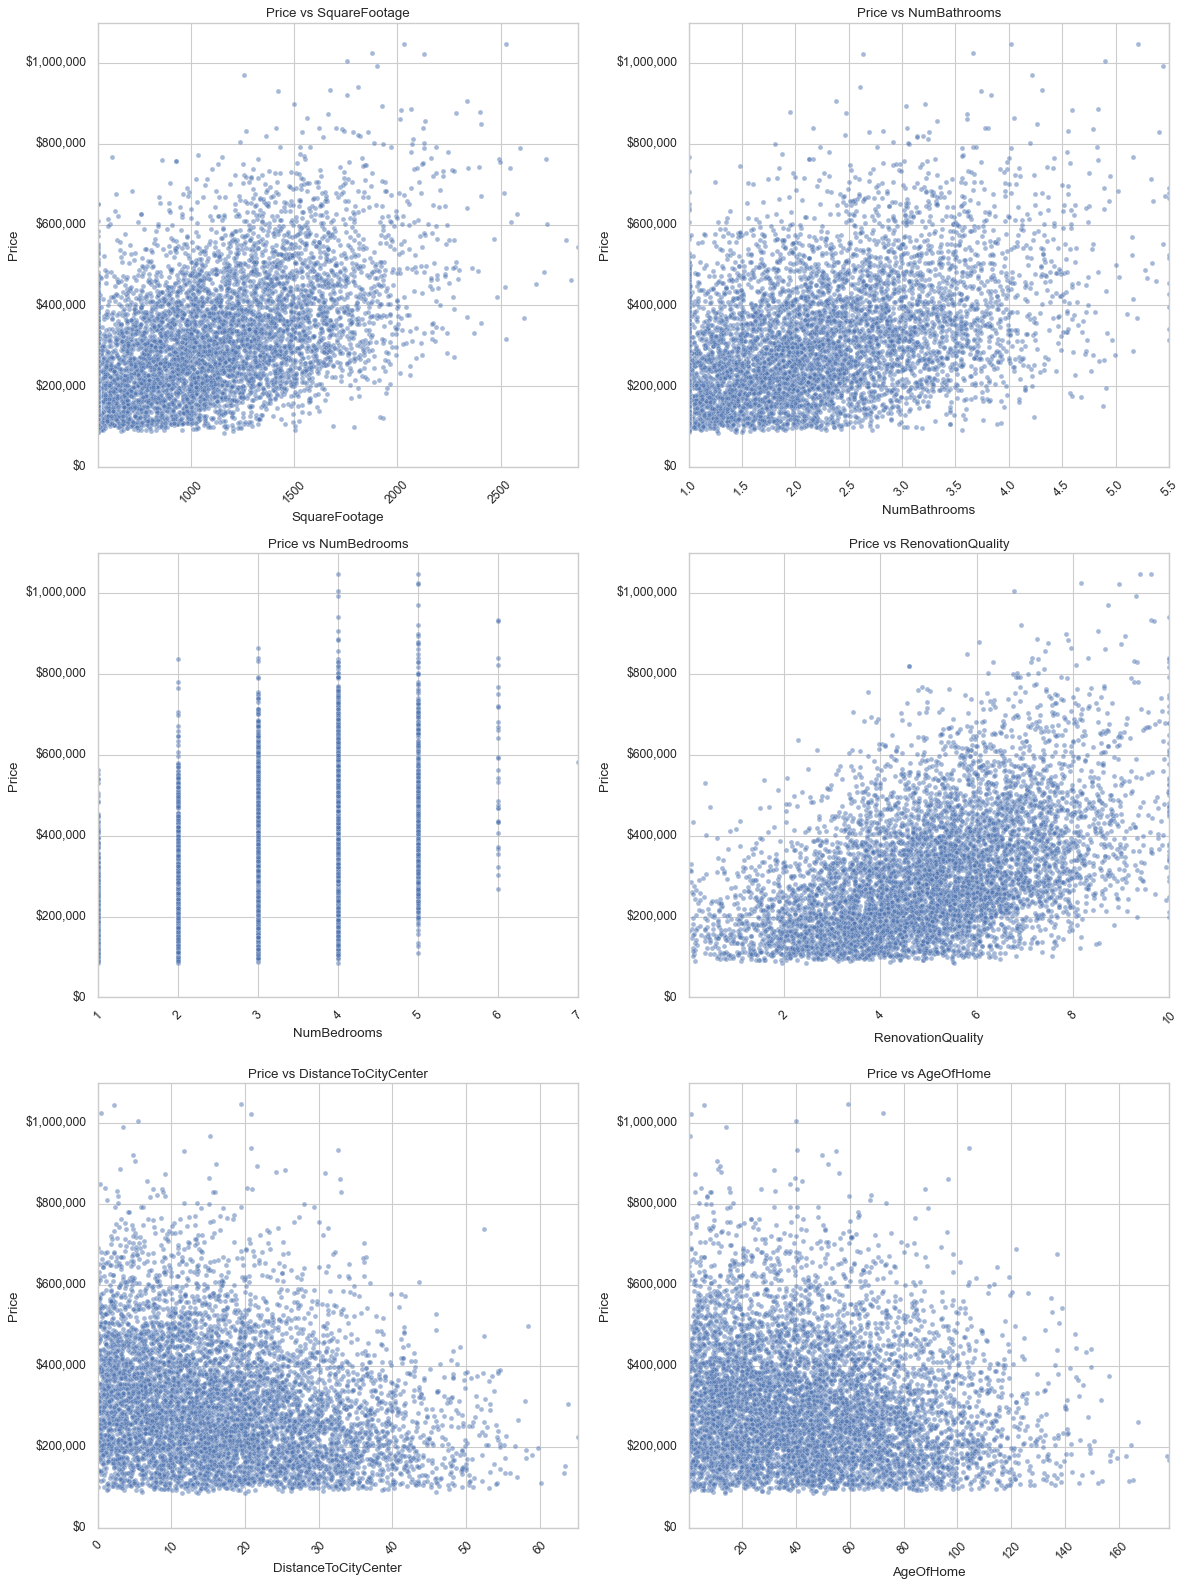

In [30]:
#  scatter plots for each variable vs price
variables = ['SquareFootage', 'NumBathrooms', 'NumBedrooms', 
            'RenovationQuality',  'DistanceToCityCenter', 'AgeOfHome']

#  grid of 2 plots per row
fig, axes = plt.subplots(nrows=(len(variables) + 1) // 2, ncols=2, figsize=(15, 20))
axes = axes.flatten()

#  currency for price axis
def currency_formatter(x, p):
    return f'${x:,.0f}'

# plot each variable vs price
for i, var in enumerate(variables):
    sns.scatterplot(data=data_cleaned, x=var, y='Price', alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Price vs {var}')
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(currency_formatter))
    
    #  x-axis limits based on data range
    min_val = data_cleaned[var].min()
    max_val = data_cleaned[var].max()
    axes[i].set_xlim(min_val, max_val)
    
    #  y-axis limits
    axes[i].set_ylim(0, data_cleaned['Price'].max() * 1.05)  # 5% padding
    
    # rotate x-axis labels 
    axes[i].tick_params(axis='x', rotation=45)

# remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
